## K-meansスクラッチ
K-meansのクラスをスクラッチで作成していきます。NumPyなど最低限のライブラリのみを使いアルゴリズムを実装していきます。

以下に雛形を用意してあります。このScratchKMeansクラスにコードを書き加えていってください。

《雛形》
```
class ScratchKMeans():
    """
    K-meansのスクラッチ実装

    Parameters
    ----------
    n_clusters : int
      クラスタ数
    n_init : int
      中心点の初期値を何回変えて計算するか
    max_iter : int
      1回の計算で最大何イテレーションするか
    tol : float
      イテレーションを終了する基準となる中心点と重心の許容誤差
    verbose : bool
      学習過程を出力する場合はTrue
    """
    def __init__(self, n_clusters, n_init, max_iter, tol, verbose=False):
        # ハイパーパラメータを属性として記録
        self.n_clusters = n_clusters
        self.n_init = n_init
        self.max_iter = max_iter
        self.tol  tol
        self.verbose = verbose
    def fit(self, X):
        """
        K-meansによるクラスタリングを計算
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        """
        if self.verbose:
            #verboseをTrueにした際は学習過程を出力
            print()
        pass
    def predict(self, X):
        """
        入力されたデータがどのクラスタに属するかを計算
        """
        pass
        return
```

In [1]:
import numpy as np

In [2]:
class ScratchKMeans():
    """
    K-meansのスクラッチ実装

    Parameters
    ----------
    n_clusters : int
      クラスタ数
    n_init : int
      中心点の初期値を何回変えて計算するか
    max_iter : int
      1回の計算で最大何イテレーションするか
    tol : float
      イテレーションを終了する基準となる中心点と重心の許容誤差
    verbose : bool
      学習過程を出力する場合はTrue
    """
    def __init__(self, n_clusters, n_init, max_iter, tol, verbose=False):
        # ハイパーパラメータを属性として記録
        self.n_clusters = n_clusters
        self.n_init = n_init
        self.max_iter = max_iter
        self.tol = tol
        self.verbose = verbose
        
    def fit(self, X):
        """
        K-meansによるクラスタリングを計算
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        """
        list_center_points = []
        list_r = []
        
        for i in range(self.n_init):
            tmp_center_points = _init_center_points(self.n_clusters, X)

            for j in range(self.max_iter):
                # データに対するクラスタの判定
                r = self._judge_cluster(X, tmp_center_points)
                # 中心点の移動
                next_center_points = _move_center_points(X, r)
                # 中心点と重心の差がtol以下
                if np.linalg.norm((next_center_points - tmp_center_points), ord=2) <= self.tol:
                    tmp_center_points = next_center_points
                    break
                tmp_center_points = next_center_points
            
            list_center_points.append(tmp_center_points)
            list_r.append(r)
            
        min_sse = 1000
        min_index = 0
        for i, (center_points, r) in enumerate(zip(list_center_points, list_r)):
            tmp_sse = self._calculate_SSE(X, center_points, r)
            if tmp_sse < min_sse:
                min_index = i
                min_sse = tmp_sse
        
        self.center_points = list_center_points[min_index]
        self.sse = min_sse

# 今はコメントアウトしておく
#         if self.verbose:
#             #verboseをTrueにした際は学習過程を出力
#             print()
    
    def predict(self, X):
        """
        入力されたデータがどのクラスタに属するかを計算
        """
        r = self._judge_cluster(X, self.center_points)

        list_predict = []
        for data, r_nk in zip(X, r):
            list_predict.append(int(np.where(r_nk == 1)[0]))

        return np.array(list_predict)
    
    def _init_center_points(self, k, X):
        """
        K-meansの中心点を初期化する
        Parameters
        ----------
        k : int
            クラスタ数
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        """
        list_center_points = []
        for i in range(k):
            index = np.random.choice(range(len(X)))
            list_center_points.append(X[index])

        return np.array(list_center_points)

    def _calculate_SSE(self, X, center_points, r):
        """
        SSEを計算する
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        center_points : 次の形のndarray, shape (クラスタ数, )
            クラスタの中心点
        r : 次の形のndarray, shape (n_samples, クラスタ数)
            データがどのクラスタに属しているか    
        """
        sse = (np.linalg.norm((X - center_points[np.argmax(r, axis=1)]), ord=2, axis=1)**2).sum()

        return sse

    def _judge_cluster(self, X, center_points):
        """
        データがどのクラスタに属しているかを判定する行列(r)を計算する
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        center_points : 次の形のndarray, shape (クラスタ数, )
            クラスタの中心点
        """
        distance = np.linalg.norm(np.repeat([X], len(center_points), axis=0) \
                               - center_points.reshape(len(center_points),1,X.shape[1]), ord=2, axis=2)

        X_cluster = np.argmin(distance, axis=0)

        r = np.zeros((len(X), len(center_points)))
        for i, cluster in enumerate(X_cluster):
            r[i][cluster] = 1

        return r.astype(int)

    def _move_center_points(self, X, r):
        """
        全てのデータXの平均値に中心点を定義する
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        r : 次の形のndarray, shape (n_samples, クラスタ数)
            データがどのクラスタに属しているか
        """
        next_center_point = []
        for i in range(r.shape[1]):
            next_center_point.append(np.mean(X[np.where(r[:, i] == 1)], axis=0))

        return np.array(next_center_point)

#### クラスタリングのための人工データセット
クラスタリングを実験するための人工データセットを作成するコードを用意しています。

このmake_blobs関数は正解ラベルも出力してますが、今回は使用しません。使用しないことを明示するために、 _（アンダースコア） で受け取っています。

《シンプルデータセット3》

In [3]:
from sklearn.datasets import make_blobs
X, _ = make_blobs(n_samples=100, n_features=2, centers=4, cluster_std=0.5, shuffle=True, random_state=0)

#### 学習
K-meansの学習に必要な要素を順番に作成していきます。

### 【問題1】中心点の初期値を決める
入力されたデータから $K$ 個の中心点 $\mu_1$ から $\mu_K$ の初期値を決めるコードを作成してください。$K$ は指定したクラスタ数です。

最もシンプルな初期値の決定方法は、データ点 $X_n$ の中からランダムに $K$ 個選ぶことです。今回はこれを実装してください。

K-meansの学習結果は中心点 $\mu$ の初期値に影響を受けます。そのため、学習時には複数個の初期値で計算を行います。

In [4]:
def _init_center_points(k, X):
    """
    K-meansの中心点を初期化する
    Parameters
    ----------
    k : int
        クラスタ数
    X : 次の形のndarray, shape (n_samples, n_features)
        訓練データの特徴量
    """
    list_center_points = []
    for i in range(k):
        index = np.random.choice(range(len(X)))
        list_center_points.append(X[index])
    
    return np.array(list_center_points)

### 【問題2】SSEを求める関数の作成
クラスタ内誤差平方和（SSE, Sum of Squared Errors）を計算する関数を作成してください。

K-meansはこのSSEを最小化する $r_{nk}$ と $\mu_k$ を求めることが目的となります。複数個の初期値で計算したクラスタリング結果から、どれを最終的に採用するかを決める際にこのSSEを求める関数を使用します。

$$
SSE=\sum_{n=1}^N\sum_{k=1}^Kr_{nk}||X_n-\mu_k||^2
$$

$n$ : データ点のインデックス

$k$ : クラスタのインデックス

$X_n$ : $n$番目のデータ点

$\mu_k$ : $k$番目の中心点

$r_{nk}$ : データ点$X_n$がクラスタ$k$に所属していたら1、そうでなければ0

In [5]:
def _calculate_SSE(X, center_points, r):
    """
    SSEを計算する
    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
        訓練データの特徴量
    center_point : 次の形のndarray, shape (クラス多数, )
        クラスタの中心点
    r : 次の形のndarray, shape (n_samples, クラスタ数)
        データがどのクラスタに属しているか    
    """
    sse = (np.linalg.norm((X - center_points[np.argmax(r, axis=1)]), ord=2, axis=1)**2).sum()

    return sse
    
def _judge_cluster(X, center_points):
    """
    データがどのクラスタに属しているかを判定するmatrixを計算する
    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
        訓練データの特徴量
    center_point : 次の形のndarray, shape (クラスタ数, )
        クラスタの中心点
    """
    distance = np.linalg.norm(np.repeat([X], len(center_points), axis=0) \
                           - center_points.reshape(len(center_points),1,X.shape[1]), ord=2, axis=2)
    
    X_cluster = np.argmin(distance, axis=0)
    
    r = np.zeros((len(X), len(center_points)))
    for i, cluster in enumerate(X_cluster):
        r[i][cluster] = 1
        
    return r.astype(int)

In [6]:
center_points = _init_center_points(3, X)
center_points

array([[-1.497272  ,  8.80022604],
       [ 1.00952869,  4.45502328],
       [ 2.06051753,  1.79059891]])

In [7]:
r = _judge_cluster(X, center_points)
r

array([[0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1,

In [8]:
X - center_points[np.argmax(r, axis=1)]

array([[-0.28866118, -0.74155204],
       [-0.39741223, -0.83124059],
       [ 0.34726025, -0.09039844],
       [ 0.0442151 ,  0.03784531],
       [ 0.58188673,  0.44995398],
       [-0.22692202, -0.30238732],
       [-2.96704555, -0.58210854],
       [ 0.72372663, -0.92099041],
       [-0.88639371,  0.82415175],
       [ 0.06442531, -1.08445562],
       [ 0.56908199, -1.77324405],
       [-0.25109145, -1.73715158],
       [ 0.22937482, -1.54881278],
       [ 0.51065456, -1.05053919],
       [ 0.67743153, -1.29027882],
       [ 0.93632534, -1.56681478],
       [-0.59181171,  0.07887535],
       [-1.34486032, -1.06490127],
       [-2.87359903, -1.52122574],
       [ 0.56445033, -1.51034816],
       [ 1.1016187 , -0.87841879],
       [-0.3247181 , -1.18367605],
       [-2.92139074, -1.26751642],
       [ 0.22758121, -1.66105709],
       [-0.48099189,  0.0422153 ],
       [-2.58565897, -1.86888016],
       [-1.57496169, -0.79688362],
       [-0.20721469, -0.07306146],
       [ 0.73887609,

In [9]:
np.linalg.norm((X - center_points[np.argmax(r, axis=1)]), ord=2, axis=1)

array([0.79575417, 0.92135628, 0.35883361, 0.05820002, 0.73556152,
       0.37806309, 3.02360871, 1.17132556, 1.21033876, 1.08636762,
       1.86232349, 1.75520441, 1.56570553, 1.16807563, 1.4573033 ,
       1.82527085, 0.59704474, 1.71541948, 3.25141494, 1.6123758 ,
       1.40896534, 1.22740818, 3.18451279, 1.67657504, 0.4828409 ,
       3.19035191, 1.76508578, 0.21971778, 0.74092098, 1.14337531,
       1.12575282, 1.85296031, 1.09700537, 0.        , 2.47548991,
       0.5912774 , 0.        , 0.34949136, 1.36326844, 3.50215384,
       0.57720388, 2.73955574, 2.07774313, 3.14878332, 3.30366934,
       0.65320501, 1.26180289, 3.09592738, 0.4691428 , 1.23733672,
       0.7011113 , 0.87971554, 2.78351494, 2.82130035, 2.86488295,
       1.35464846, 0.84198399, 0.90300178, 0.5666803 , 1.16653875,
       1.65381055, 0.65270221, 0.6943844 , 0.9369564 , 0.75953144,
       1.02180962, 3.65098517, 3.13208235, 0.41652445, 0.18931693,
       0.6791299 , 0.73577434, 0.10062517, 0.95626258, 0.24504

In [10]:
_calculate_SSE(X, center_points, r)

294.144587472639

#### クラスタの割り当てと中心点の移動を繰り返す
K-meansの学習の基本は以下の2つのフェーズを繰り返すことです。

- 中心点 $\mu_k$ を固定した上で $SSE$ を最小化する クラスタの割り当て $r_{nk}$ を選ぶ。
- クラスタの割り当て $r_{nk}$ を固定した上で $SSE$ を最小化する 中心点 $\mu_k$ を選ぶ。

最初の中心点 $\mu_k$ は問題1で作成した初期値です。

順番に見ていきます。

### 【問題3】クラスタへの割り当て
全てのデータ点 $X_n$ を最も近い中心点 $\mu_k$ に割り当てるコードを作成してください。

K-menasにおける 近い とは点と点のユークリッド距離が小さくなることです。ユークリッド距離とはピタゴラスの定理（三平方の定理）で求められるものですが、ベクトル $p,q$ に対しては以下の数式で表現できます。

$$
||q-p||=\sqrt{(q-p)・(q-p)}
$$

NumPyにはこの関数がnp.linalg.normとして用意されているため使用してください。

[numpy.linalg.norm — NumPy v1.17 Manual](https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html)

中心点 $\mu_k$ を固定した上でSSEを最小化していることになりますが、SSE自体を求める必要はありません。

問題2の_judge_clusterで実装済み

### 【問題4】中心点の移動
中心点 $\mu_k$ を $k$ 番目のクラスタに割り当てられる全てのデータ点 $X_n$ の平均値（重心）に移動するコードを作成してください。

クラスタの割り当て $r_{nk}$ を固定した上でSSEを最小化していることになりますが、SSE自体を求める必要はありません。

In [11]:
def _move_center_points(X, r):
    """
    全てのデータXの平均値(重心)に中心点を定義する
    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
        訓練データの特徴量
    r : 次の形のndarray, shape (n_samples, クラスタ数)
        データがどのクラスタに属しているか
    """
    next_center_point = []
    for i in range(r.shape[1]):
        next_center_point.append(np.mean(X[np.where(r[:, i] == 1)], axis=0))

    return np.array(next_center_point)


In [12]:
X

array([[ 0.72086751,  3.71347124],
       [-1.89468423,  7.96898545],
       [ 1.35678894,  4.36462484],
       [ 1.05374379,  4.49286859],
       [ 1.59141542,  4.90497725],
       [ 0.78260667,  4.15263595],
       [-1.95751686,  3.87291474],
       [-0.77354537,  7.87923564],
       [ 0.12313498,  5.27917503],
       [-1.43284669,  7.71577043],
       [-0.92819001,  7.02698199],
       [-1.74836345,  7.06307447],
       [-1.26789718,  7.25141327],
       [-0.98661744,  7.74968685],
       [-0.81984047,  7.50994722],
       [ 2.99684287,  0.22378413],
       [ 1.46870582,  1.86947425],
       [-0.33533163,  3.390122  ],
       [-1.86407034,  2.93379754],
       [ 2.62496786,  0.28025075],
       [ 2.11114739,  3.57660449],
       [-1.8219901 ,  7.61654999],
       [-1.91186205,  3.18750686],
       [ 2.28809874,  0.12954182],
       [ 0.5285368 ,  4.49723858],
       [-1.57613028,  2.58614312],
       [-0.565433  ,  3.65813966],
       [ 0.802314  ,  4.38196181],
       [ 2.79939362,

In [13]:
for i in range(r.shape[1]):
    print(np.mean(X[np.where(r[:, i] == 1)], axis=0))

[-1.26811733  7.76378266]
[-0.27678616  3.72096344]
[1.99186903 0.96561071]


### 【問題5】繰り返し
クラスタへの割り当てと中心点の移動を繰り返すことで学習を行うコードを作成してください。

次のどれかの条件を満たしたらこれを止めます。

- 繰り返しが指定した回数に到達する。（雛形では引数max_iter）
- 中心点 $\mu_k$ と重心の差の合計が指定した許容値以下になる。（雛形では引数tol）

In [14]:
next_ = _move_center_points(X, r)
next_

array([[-1.26811733,  7.76378266],
       [-0.27678616,  3.72096344],
       [ 1.99186903,  0.96561071]])

In [15]:
center_points

array([[-1.497272  ,  8.80022604],
       [ 1.00952869,  4.45502328],
       [ 2.06051753,  1.79059891]])

In [16]:
next_ - center_points

array([[ 0.22915467, -1.03644339],
       [-1.28631485, -0.73405984],
       [-0.0686485 , -0.8249882 ]])

In [17]:
np.linalg.norm((next_ - center_points), ord=2)

1.6791853255688969

- fitに処理追加

### 【問題6】異なる初期値で計算
問題5の繰り返しを、指定した回数初期値を変更して計算するコードを作成してください。回数は雛形では引数n_initで指定します。

複数計算した中でSSEが最小になったものが最終的な学習結果となるため、その時の中心点 $\mu_k$ を保持しておきます。

- fitに処理追加

### 【問題7】推定
新たなデータに対してどのクラスタに所属するかの推定の際は、学習時の1つ目のフェーズと同じことを行います。

- データ点 $X_n$ と学習で決まった中心点 $\mu_k$ に対し、 $SSE$ を最小化する $r_{nk}$ を選ぶ。

具体的には次のことです。

- データ点 $X_n$ を最も近い $\mu_k$ に割り当てる。

- predictに処理追加

シンプルデータセット3でテストしてみる。

In [18]:
kmeans = ScratchKMeans(n_clusters=4, n_init=5, max_iter=200, tol=1)
kmeans.fit(X)
y_pred = kmeans.predict(X)
y_pred

array([1, 0, 1, 1, 1, 1, 3, 0, 1, 0, 0, 0, 0, 0, 0, 2, 2, 3, 3, 2, 1, 0,
       3, 2, 1, 3, 3, 1, 2, 2, 2, 0, 2, 2, 3, 1, 0, 2, 0, 3, 1, 3, 0, 3,
       3, 0, 2, 3, 1, 1, 1, 2, 3, 3, 3, 0, 0, 2, 2, 0, 0, 2, 2, 1, 2, 0,
       3, 3, 2, 1, 0, 2, 1, 0, 1, 1, 3, 3, 2, 2, 2, 0, 3, 1, 2, 3, 2, 2,
       1, 1, 1, 3, 1, 3, 3, 0, 0, 3, 0, 1])

<function matplotlib.pyplot.show(*args, **kw)>

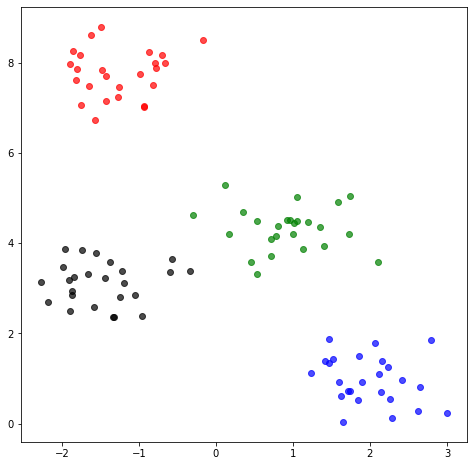

In [19]:
import matplotlib.pyplot as plt

c_map = ['r', 'g', 'b', 'k']

plt.figure(figsize=(8, 8))
for cluster in np.unique(y_pred):
    index = np.where(y_pred == cluster)
    plt.scatter(X[index, 0], X[index, 1], 
                marker="o", alpha=0.7, c=c_map[cluster])

plt.show

問題なくクラスタリングできている。参考までに、クラスタ数を3にするとどうなるか実験。

In [20]:
kmeans = ScratchKMeans(n_clusters=3, n_init=5, max_iter=200, tol=1)
kmeans.fit(X)
y_pred = kmeans.predict(X)
y_pred

array([1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 0, 0, 1, 1, 0, 1, 2,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 2, 0, 0, 1, 1, 2, 0, 2, 1, 1, 1, 2, 1,
       1, 2, 0, 1, 1, 1, 1, 0, 1, 1, 1, 2, 2, 0, 0, 2, 2, 0, 0, 1, 0, 2,
       1, 1, 0, 1, 2, 0, 1, 2, 1, 1, 1, 1, 0, 0, 0, 2, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1])

<function matplotlib.pyplot.show(*args, **kw)>

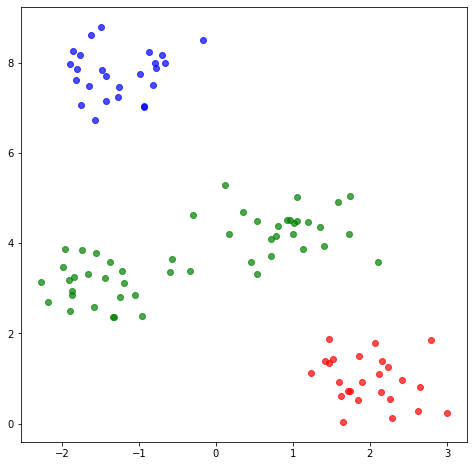

In [21]:
c_map = ['r', 'g', 'b', 'k']

plt.figure(figsize=(8, 8))
for cluster in np.unique(y_pred):
    index = np.where(y_pred == cluster)
    plt.scatter(X[index, 0], X[index, 1], 
                marker="o", alpha=0.7, c=c_map[cluster])

plt.show

### 【問題8】エルボー法の実装
K-meansにおいて中心点の個数 $k$ は人為的に決める必要がありますが、その判断方法としてエルボー法があります。エルボー法により中心点の個数 $k$ を検討するためのコードを作成してください。

SSEを縦軸、クラスタ数 $k$ を横軸にした折れ線グラフを表示します。このためにK-meansのインスタンスからはSSEを取得できるようにしてください。

In [22]:
def elbow_method(X, max_num_cluster):
    list_sse = []
    num_cluster = list(range(max_num_cluster+1))[2:]
    for num in num_cluster:
        kmeans = ScratchKMeans(n_clusters=num, n_init=10, max_iter=500, tol=0.01)
        kmeans.fit(X)
        list_sse.append(kmeans.sse)
    
    plt.plot(num_cluster, list_sse, marker="*", markersize=15)

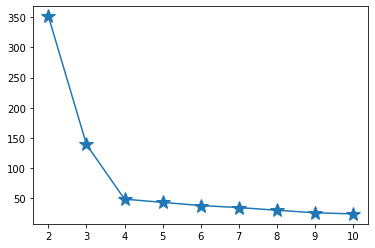

In [52]:
elbow_method(X, 10)

エルボー法により、最適なクラスタ数は4だと分かる。

### 【問題9】（アドバンス課題）シルエット図
$k$ を決める助けになるものとしてシルエット図もあります。シルエット図を表示するコードを作成してください。

Matplotlibを使い図を表示するコードは用意しました。以下を与えてください。

silhouette_vals : shape(n_samples,)のndarray、各データ点のシルエット係数

silhouette_avg : float、シルエット係数の平均値

y_km : shape(n_samples,)のndarray、各データ点のクラスタラベル名

cluster_labels : list、クラスタのラベル名のリスト

n_clusters : int、クラスタ数

$n$ 番目のデータ点に対するシルエット係数 $s_n$ は以下の数式でを求められます。この数式を実装し、シルエット図を確認してください。

$$
s_n=\frac{b_n-a_n}{max(b_n,a_n)}
$$

$a_n$ : 凝集度。同じクラスタ内の他のデータ点との距離の平均値。

$b_n$ : 乖離度。最も近い他のクラスタ内の全てのデータ点との距離の平均値。

乖離度 $b$ が大きく、凝集度 $a$ が小さい時が理想的であり、シルエット係数 $s$ は1に近くなります。

《シルエット図を表示するためのコード》
```
from matplotlib import cm
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(i / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2)
    y_ax_lower += len(c_silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--")
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.show()
```

In [24]:
from matplotlib import cm

def silhouette_analysis(X, n_clusters):
    
    kmeans = ScratchKMeans(n_clusters=n_clusters, n_init=10, max_iter=500, tol=0.01)
    kmeans.fit(X)
    y_km = kmeans.predict(X)
    
    silhouette_vals = calculate_silhouette_coef(X, y_km, kmeans)
    silhouette_avg = sum(silhouette_vals)/len(silhouette_vals)
    
    cluster_labels = np.unique(y_km)
    
    y_ax_lower, y_ax_upper = 0, 0
    yticks = []
    for i, c in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[y_km == c]
        c_silhouette_vals.sort()
        y_ax_upper += len(c_silhouette_vals)
        color = cm.jet(i / n_clusters)
        plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)
        yticks.append((y_ax_lower + y_ax_upper) / 2)
        y_ax_lower += len(c_silhouette_vals)
    plt.axvline(silhouette_avg, color="red", linestyle="--")
    plt.yticks(yticks, cluster_labels + 1)
    plt.ylabel('Cluster')
    plt.xlabel('Silhouette coefficient')
    plt.show()

# シルエット係数
def calculate_silhouette_coef(X, y, model):
    s_n = []
    for i, data in enumerate(X):
        cohesion = calculate_cohesion(X, data, y, i)
        divergence = calculate_divergence(X, data, y, i, model)
        s_n.append((divergence - cohesion) / max([cohesion, divergence]))
        
    return np.array(s_n)

# 凝集度
def calculate_cohesion(X, data, labels, index_data):
    index = np.where(labels == labels[index_data])
    sum_distance = 0
    for x in X[index]:
        sum_distance += np.linalg.norm(data - x, ord=2)

    cohesion = sum_distance/len(X[index])
    return cohesion

# 乖離度
def calculate_divergence(X, data, labels, index_data, model):
    cluster=labels[index_data]

    neighbor_cluster = 0
    for i, center_point in enumerate(model.center_points):
        if cluster == i:
            continue
        tmp_distance = np.linalg.norm(data - center_point, ord=2)
        min_distance = 100
        if tmp_distance < min_distance:
            neighbor_cluster = i
            min_distance = tmp_distance

    sum_distance = 0
    index = np.where(labels == neighbor_cluster)
    for x in X[index]:
        sum_distance += np.linalg.norm(data - x, ord=2)

    divergence = sum_distance/len(X[index])

    return divergence

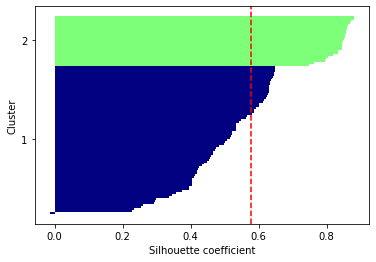

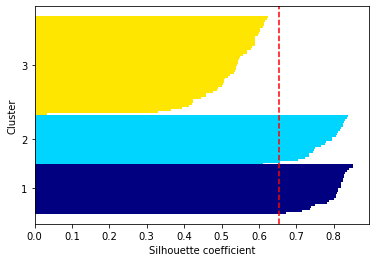

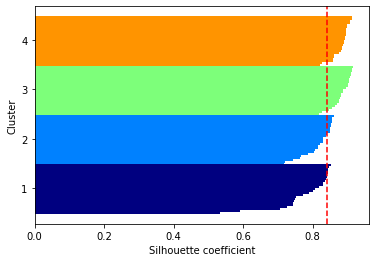

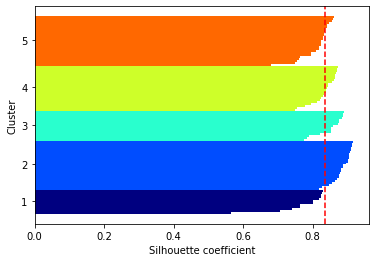

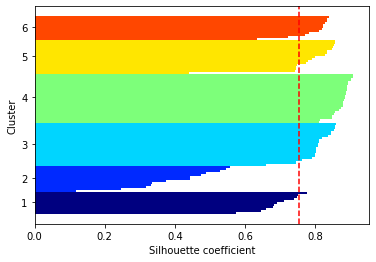

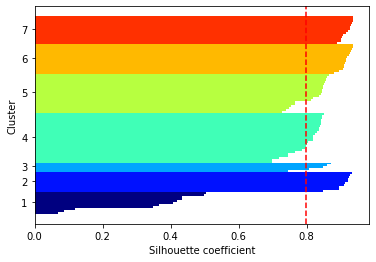

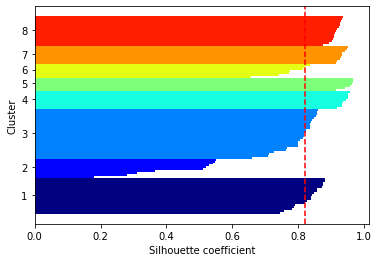

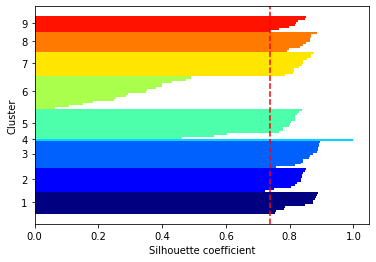

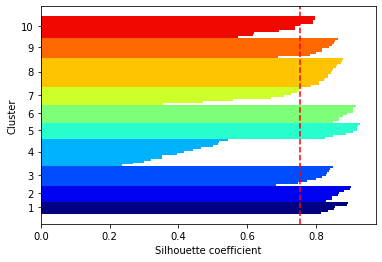

In [25]:
for i in list(range(10+1))[2:]:
    silhouette_analysis(X, i)

シルエット図からも、クラスタ数が4が適切であることが分かる。

## クラスタ分析
#### 卸売業者のデータ分析
クラスタリングを利用法を学ぶために、Wholesale customers Data Setを使用します。

[UCI Machine Learning Repository: Wholesale customers Data Set](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers)

Data Folderの中からWholesale customers data.csvをダウンロードしてください。これはポルトガルのリスボンにある卸売業者（wholesale）が顧客から集めたデータです。中身は各顧客が年間でミルクや食料品を何ユーロ購入しているかというデータになっています。顧客は小売店やレストランです。RegionとChannelは取り覗き、金額のデータでK-meansを利用します。

#### 次元削減
金額に関する特徴量は6個ありますが、可視化するために次元削減を行います。これに関してはscikit-learnによるPCAのサンプルコードを用意したので利用してください。

《PCAのサンプルコード》
```
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca = pca.fit(data)
data_pca = pca.transform(data)
```

《PCAの分散説明率を表示するコードサンプル》
```
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA(n_components=None)
pca = pca.fit(data)
var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)
print(cum_var_exp)
plt.bar(range(1,7), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,7), cum_var_exp, where='mid', label='cumulative expalined variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.hlines(0.7, 0, 6,  "blue", linestyles='dashed')
plt.legend(loc='best')
plt.grid()
plt.show()
```

In [26]:
import pandas as pd
df = pd.read_csv('Wholesale customers data.csv')
df_drop = df.drop(columns=["Channel", "Region"])
df_drop

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204
436,39228,1431,764,4510,93,2346
437,14531,15488,30243,437,14841,1867
438,10290,1981,2232,1038,168,2125


In [27]:
df_drop.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


<function matplotlib.pyplot.show(*args, **kw)>

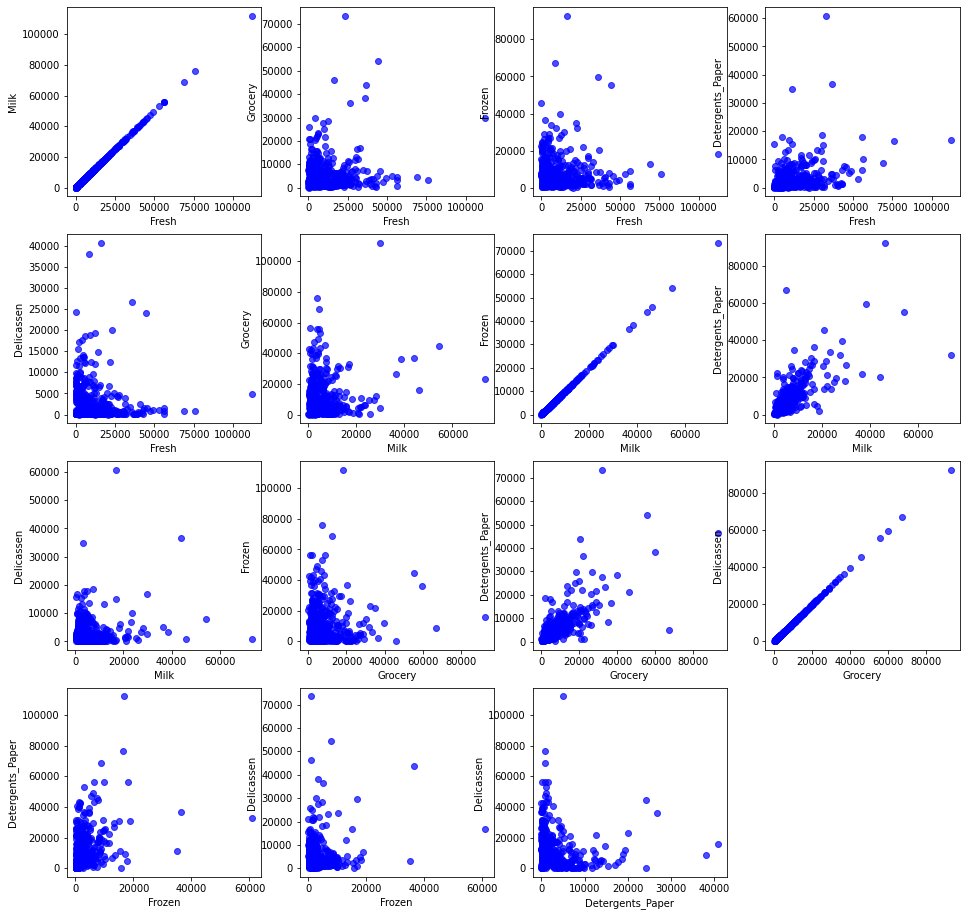

In [28]:
columns = df_drop.columns

df_drop_np = np.array(df_drop)

plt.figure(figsize=(16, 16))
cnt = 0
for i, column1 in enumerate(columns):
    for j, column2 in enumerate(columns[i+1:]):
        plt.subplot(4, 4, cnt+1)
        plt.xlabel(column1)
        plt.ylabel(column2)
        cnt += 1

        plt.scatter(df_drop_np[:, i], df_drop_np[:, j], 
                    marker="o", alpha=0.7, c="b")        

plt.show

In [29]:
data_wholesale = np.array(df_drop)
print(data_wholesale.shape)
data_wholesale_log = np.log(data_wholesale)
data_wholesale_log

(440, 6)


array([[ 9.44691334,  9.17533476,  8.93075874,  5.36597602,  7.89133076,
         7.19893124],
       [ 8.86177531,  9.19115755,  9.16617948,  7.47420481,  8.09955428,
         7.48211892],
       [ 8.75668242,  9.08341568,  8.94689552,  7.78530518,  8.16507926,
         8.96750419],
       ...,
       [ 9.58403958,  9.64782081, 10.31702003,  6.0799332 ,  9.6051489 ,
         7.53208814],
       [ 9.23892783,  7.59135705,  7.71065332,  6.94505106,  5.12396398,
         7.66152708],
       [ 7.93272103,  7.43720637,  7.82803803,  4.17438727,  6.16751649,
         3.95124372]])

In [85]:
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()
# data_wholesale = scaler.fit_transform(df_drop)
# data_wholesale = 10*data_wholesale + 10
# print(data_wholesale.max())
# print(data_wholesale.min())
data_wholesale = np.array(df_drop)
data_wholesale

array([[12669,  9656,  7561,   214,  2674,  1338],
       [ 7057,  9810,  9568,  1762,  3293,  1776],
       [ 6353,  8808,  7684,  2405,  3516,  7844],
       ...,
       [14531, 15488, 30243,   437, 14841,  1867],
       [10290,  1981,  2232,  1038,   168,  2125],
       [ 2787,  1698,  2510,    65,   477,    52]])

### 【問題10】クラスタ数kの選択
最適だと思われるクラスタ数 $k$ を選択してください。エルボー法やシルエット図を活用する他、人間が後々どう利用したいのかも選択に関わってきます。選択した上で、なぜそれを選んだか説明してください。

In [31]:
df[["Channel", "Region"]].describe()

,Channel,Region
count,440.000000,440.000000
mean,1.322727,2.543182
std,0.468052,0.774272
min,1.000000,1.000000
25%,1.000000,2.000000
50%,1.000000,3.000000
75%,2.000000,3.000000
max,2.000000,3.000000


- Channel:ホテル・レストラン・カフェ(298)または小売店(142)を指す名義尺度
- Region:地域（リスボン(77)、ポルト(47)、その他(316)）を指す名義尺度

上記の名義尺度によって傾向があると仮定するならば、クラスタ数は2または3が望ましいと思われる。

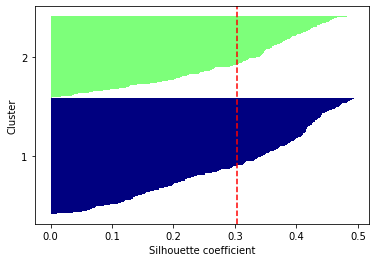

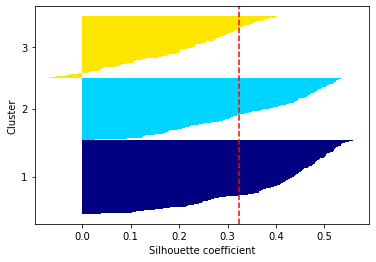

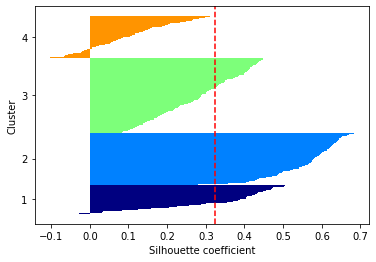

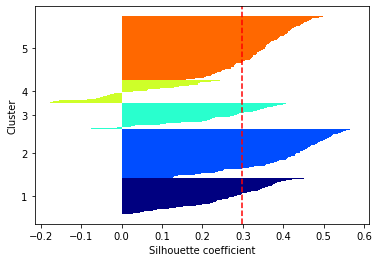

In [59]:
for i in list(range(5+1))[2:]:
    silhouette_analysis(data_wholesale_log, i)

シルエット図(np.logによるスケール)からは、最も適していると思われるクラス多数は2または3であると読み取れる。

PCA削減を用いたデータでクラスタ数を検討してみる。

/home/timanishi/.pyenv/versions/3.7.8/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/timanishi/.pyenv/versions/3.7.8/lib/python3.7/site-packages/numpy/core/_methods.py:154: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


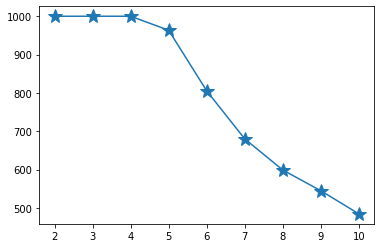

In [73]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca = pca.fit(data_wholesale_log)
data_pca = pca.transform(data_wholesale_log)

elbow_method(data_pca, 10)

[0.44237417 0.71894523 0.83511865 0.93129585 0.97705265 1.        ]


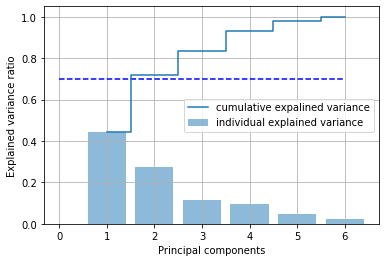

In [74]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA(n_components=None)
pca = pca.fit(data_wholesale_log)
var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)
print(cum_var_exp)
plt.bar(range(1,7), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,7), cum_var_exp, where='mid', label='cumulative expalined variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.hlines(0.7, 0, 6,  "blue", linestyles='dashed')
plt.legend(loc='best')
plt.grid()
plt.show()

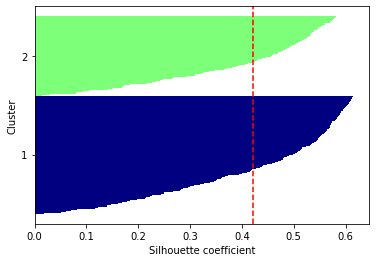

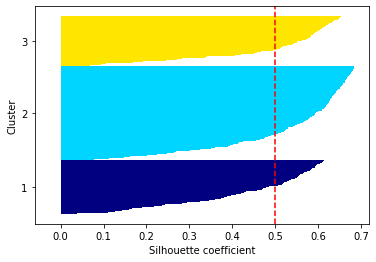

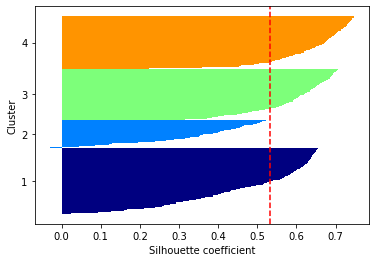

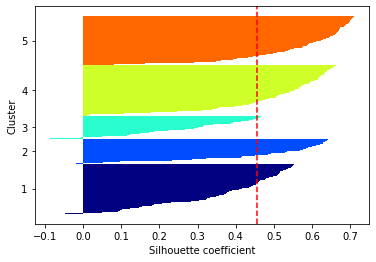

In [77]:
for i in list(range(5+1))[2:]:
    silhouette_analysis(data_pca, i)

今回は以下の理由でクラスタ数を3に設定する。
- 地域がその他に分類されるデータの数が多い(データ数の影響が大きいと思われる)。
- 感覚的だが、シルエット図が3のほうが安定しているように見えるため。(生データ・PCAによる削減後データの両方に言える)

クラスタ数2だとチャネル、クラスタ数3だと地域ごとのクラスタに分別されると思われる。問題11でそれを確認する。

PCAで次元削減したものでクラスタリングをしてみる。(クラスタ数はシルエット図の結果より3を適用)

<function matplotlib.pyplot.show(*args, **kw)>

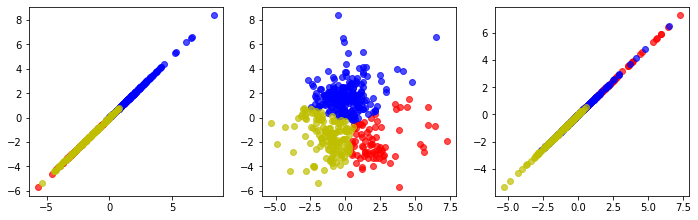

In [133]:
kmeans_wholesale = ScratchKMeans(n_clusters=3, n_init=10, max_iter=500, tol=0.01)
kmeans_wholesale.fit(data_pca)
y_pred = kmeans_wholesale.predict(data_pca)

c_map = ['r', 'b', 'y']

plt.figure(figsize=(16, 16))
cnt = 0
for i in range(2):
    for j in range(i+1):
        plt.subplot(4, 4, cnt+1)
        cnt += 1

        for cluster in np.unique(y_pred):
            index = np.where(y_pred == cluster)
            plt.scatter(data_pca[index, i], data_pca[index, j], 
                        marker="o", alpha=0.7, c=c_map[cluster])
plt.show

### 【問題11】既知のグループとの比較
RegionとChannelはK-meansに使用しなかったが、これれらは既知のグループです。クラスタとこれら既知のグループがどう違うかを確認し、説明してください。まずはそれぞれを可視化してください。

まずはクラスタ毎に分けてみる

In [130]:
# チャネル
kmeans_wholesale = ScratchKMeans(n_clusters=2, n_init=10, max_iter=500, tol=0.01)
kmeans_wholesale.fit(data_wholesale_log)
y_pred = kmeans_wholesale.predict(data_wholesale_log)
y_pred

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,

<function matplotlib.pyplot.show(*args, **kw)>

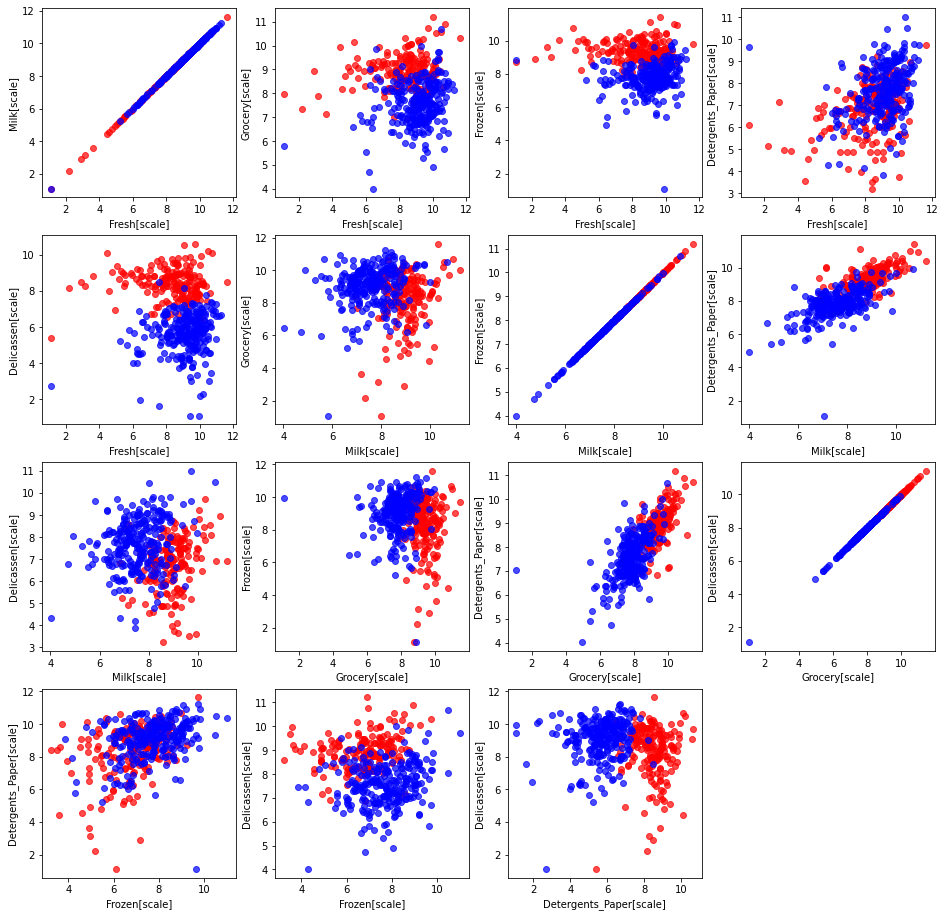

In [131]:
c_map = ['r', 'b', 'y']

columns = df_drop.columns

plt.figure(figsize=(16, 16))
cnt = 0
for i, column1 in enumerate(columns):
    for j, column2 in enumerate(columns[i+1:]):
        plt.subplot(4, 4, cnt+1)
        plt.xlabel(column1+"[scale]")
        plt.ylabel(column2+"[scale]")
        cnt += 1

        for cluster in np.unique(y_pred):
            index = np.where(y_pred == cluster)
            plt.scatter(data_wholesale_log[index, i], data_wholesale_log[index, j], 
                        marker="o", alpha=0.7, c=c_map[cluster])        
plt.show

In [128]:
# 地域
kmeans_wholesale = ScratchKMeans(n_clusters=3, n_init=10, max_iter=500, tol=0.01)
kmeans_wholesale.fit(data_wholesale_log)
y_pred = kmeans_wholesale.predict(data_wholesale_log)
y_pred

array([1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 0, 1, 2, 1, 1, 2, 0,
       2, 1, 1, 1, 2, 0, 1, 2, 1, 2, 0, 2, 0, 1, 2, 1, 1, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 2, 0, 2, 2, 2, 2, 1, 0, 2, 1, 0, 1, 0, 1, 1, 2, 1, 1, 1, 2,
       0, 2, 0, 2, 1, 2, 1, 0, 1, 0, 0, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1,
       2, 1, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 1, 2, 2, 2, 1, 0, 2, 2, 0,
       0, 0, 0, 0, 1, 0, 2, 2, 2, 2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 0, 2, 2,
       0, 1, 1, 2, 1, 1, 1, 0, 2, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       2, 2, 0, 2, 1, 2, 1, 2, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 2, 2, 1,
       2, 0, 1, 1, 2, 0, 0, 1, 0, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 0,
       0, 1, 2, 2, 0, 2, 1, 0, 0, 2, 2, 1, 2, 0, 2, 1, 0, 2, 0, 2, 2, 2,
       2, 1, 1, 1, 2, 0, 2, 2, 0, 1, 2, 2, 2, 2, 0, 2, 2, 2, 0, 0, 2, 1,
       1, 2, 1, 2, 1, 0, 0, 0, 0, 2, 0, 0, 2, 2, 2, 1, 0, 1, 2, 2, 2, 0,
       0, 2, 0, 0, 0, 2, 2, 1, 2, 1, 2, 1, 1, 0, 1,

<function matplotlib.pyplot.show(*args, **kw)>

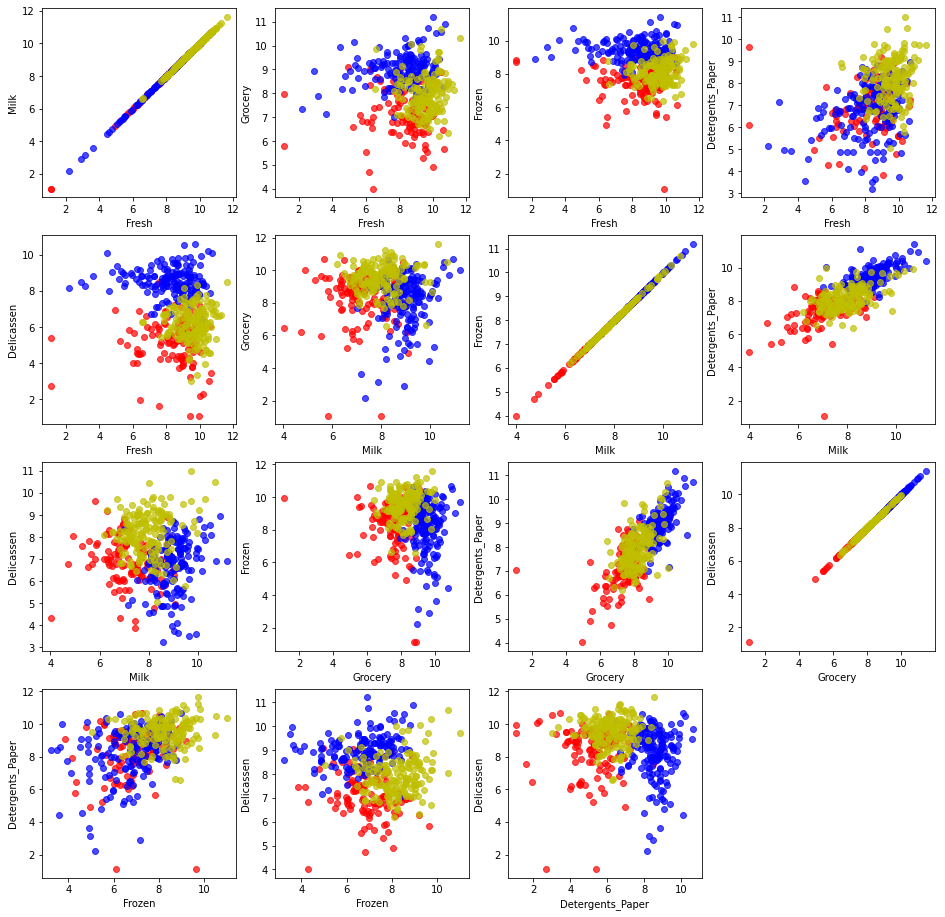

In [129]:
c_map = ['r', 'b', 'y']

columns = df_drop.columns

plt.figure(figsize=(16, 16))
cnt = 0
for i, column1 in enumerate(columns):
    for j, column2 in enumerate(columns[i+1:]):
        plt.subplot(4, 4, cnt+1)
        plt.xlabel(column1)
        plt.ylabel(column2)
        cnt += 1

        for cluster in np.unique(y_pred):
            index = np.where(y_pred == cluster)
            plt.scatter(data_wholesale_log[index, i], data_wholesale_log[index, j], 
                        marker="o", alpha=0.7, c=c_map[cluster])        
plt.show

MiniMaxでスケールしたもので図示してみる。

<function matplotlib.pyplot.show(*args, **kw)>

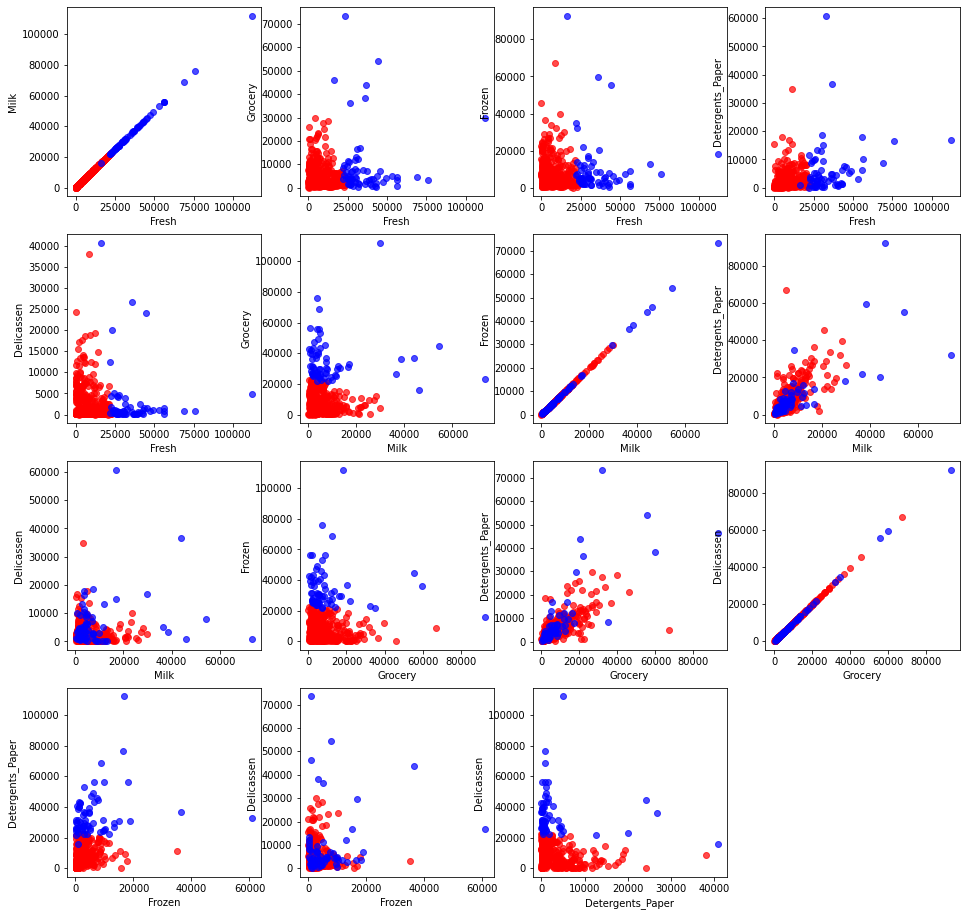

In [124]:
kmeans_wholesale = ScratchKMeans(n_clusters=2, n_init=10, max_iter=500, tol=0.01)
kmeans_wholesale.fit(data_wholesale)
y_pred = kmeans_wholesale.predict(data_wholesale)

c_map = ['r', 'b', 'y']

columns = df_drop.columns

plt.figure(figsize=(16, 16))
cnt = 0
for i, column1 in enumerate(columns):
    for j, column2 in enumerate(columns[i+1:]):
        plt.subplot(4, 4, cnt+1)
        plt.xlabel(column1)
        plt.ylabel(column2)
        cnt += 1

        for cluster in np.unique(y_pred):
            index = np.where(y_pred == cluster)
            plt.scatter(data_wholesale[index, i], data_wholesale[index, j], 
                        marker="o", alpha=0.7, c=c_map[cluster])
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

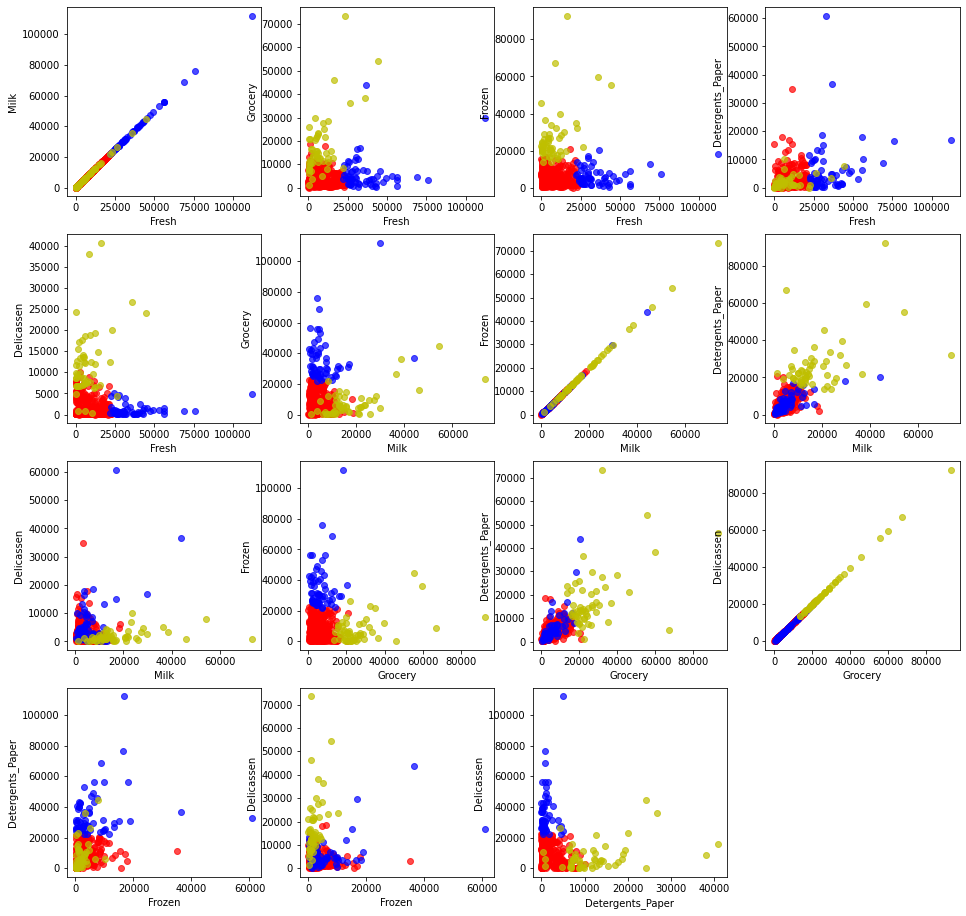

In [125]:
kmeans_wholesale = ScratchKMeans(n_clusters=3, n_init=10, max_iter=500, tol=0.01)
kmeans_wholesale.fit(data_wholesale)
y_pred = kmeans_wholesale.predict(data_wholesale)

c_map = ['r', 'b', 'y']

columns = df_drop.columns

plt.figure(figsize=(16, 16))
cnt = 0
for i, column1 in enumerate(columns):
    for j, column2 in enumerate(columns[i+1:]):
        plt.subplot(4, 4, cnt+1)
        plt.xlabel(column1)
        plt.ylabel(column2)
        cnt += 1

        for cluster in np.unique(y_pred):
            index = np.where(y_pred == cluster)
            plt.scatter(data_wholesale[index, i], data_wholesale[index, j], 
                        marker="o", alpha=0.7, c=c_map[cluster])
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

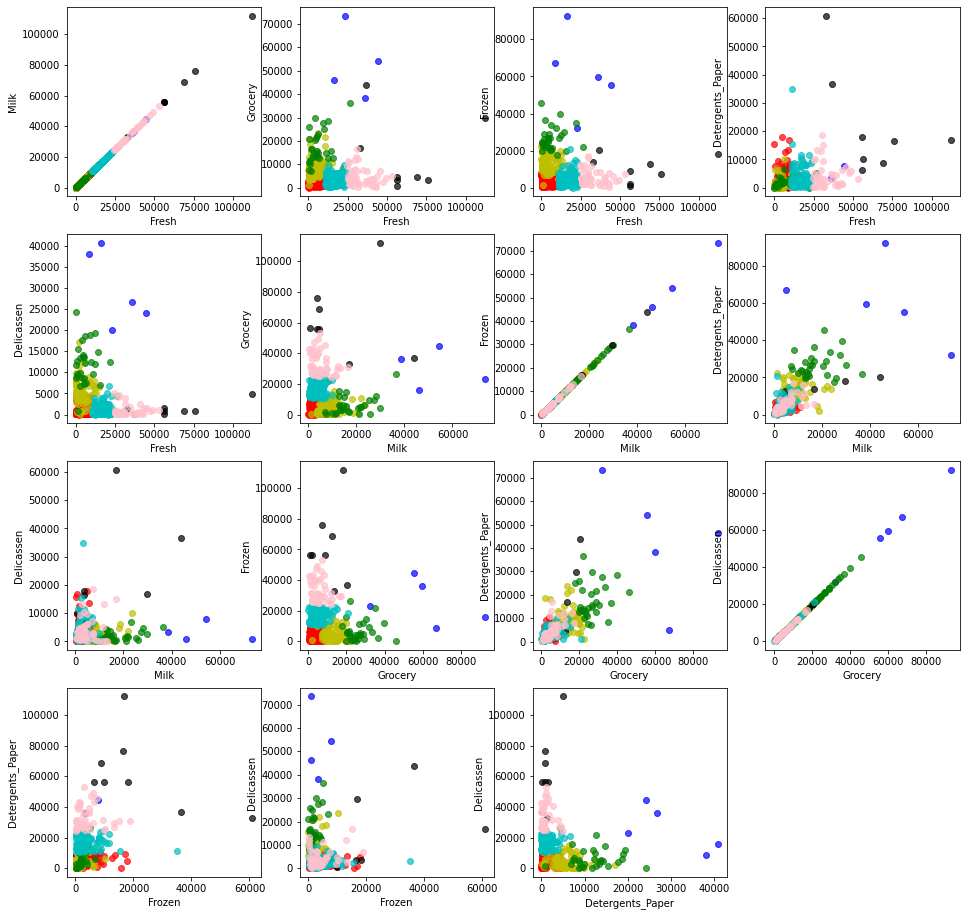

In [123]:
# お試しでクラスタ数7
kmeans_wholesale = ScratchKMeans(n_clusters=7, n_init=10, max_iter=500, tol=0.01)
kmeans_wholesale.fit(data_wholesale)
y_pred = kmeans_wholesale.predict(data_wholesale)

c_map = ['r', 'b', 'y', 'g', 'k', 'c', 'pink']

columns = df_drop.columns

plt.figure(figsize=(16, 16))
cnt = 0
for i, column1 in enumerate(columns):
    for j, column2 in enumerate(columns[i+1:]):
        plt.subplot(4, 4, cnt+1)
        plt.xlabel(column1)
        plt.ylabel(column2)
        cnt += 1

        for cluster in np.unique(y_pred):
            index = np.where(y_pred == cluster)
            plt.scatter(data_wholesale[index, i], data_wholesale[index, j], 
                        marker="o", alpha=0.7, c=c_map[cluster])
plt.show

元々のデータに偏りがあるため、なかなか明確にクラスタリングすることが難しい。が、非線形関数でスケールすると、その後のクラスタリングで分割された領域の意味合いが変わる可能性があることは留意しておきたい。

次に、既知グループで分けてみる。

<function matplotlib.pyplot.show(*args, **kw)>

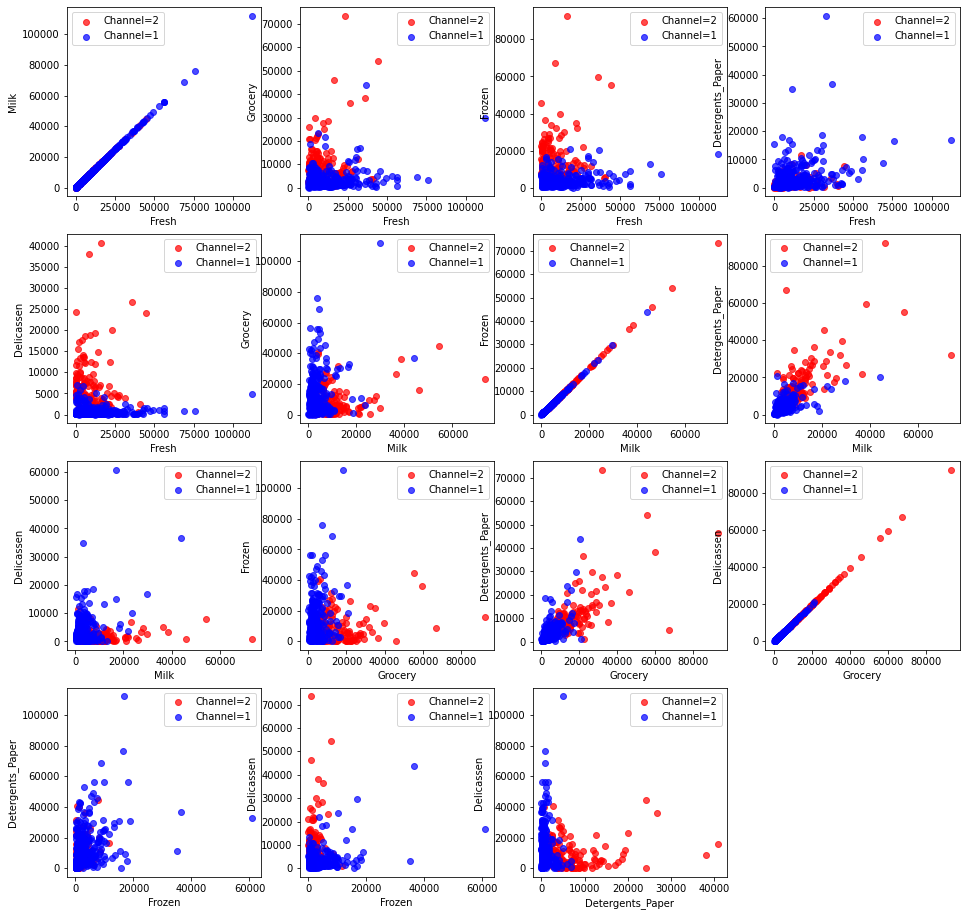

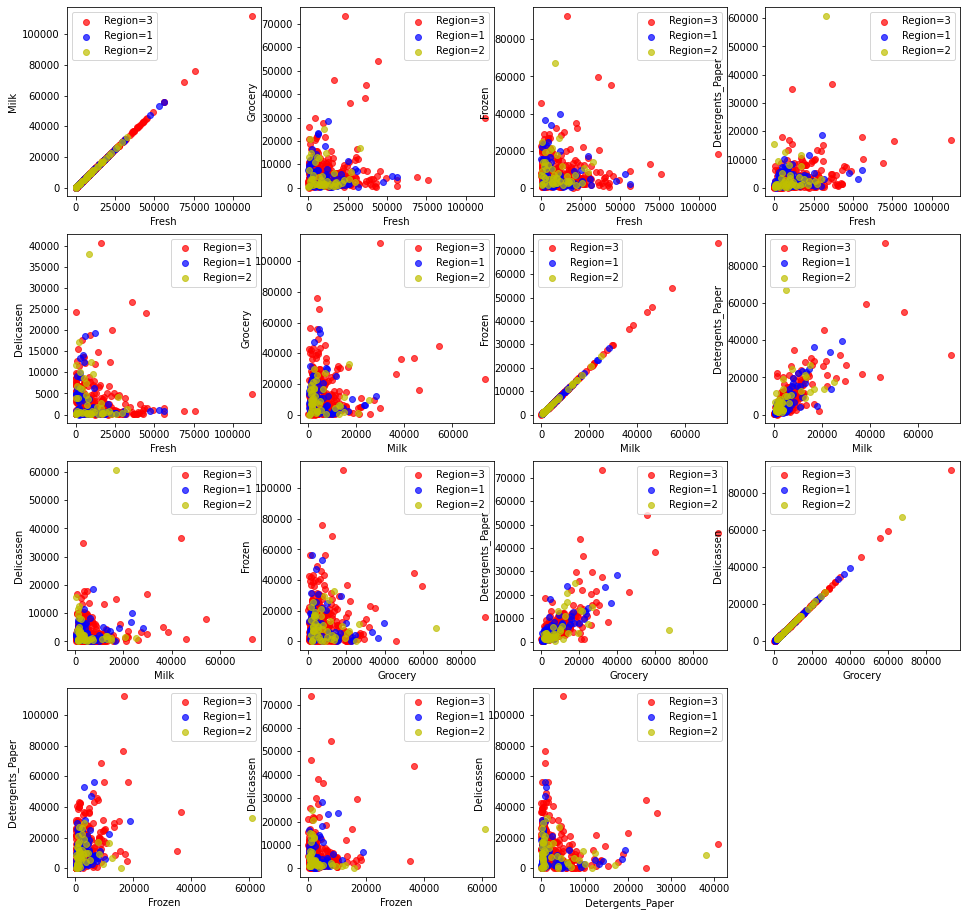

In [46]:
c_map = ['r', 'b', 'y']

columns = df_drop.columns

plt.figure(figsize=(16, 16))
cnt = 0
for i, column1 in enumerate(columns):
    for j, column2 in enumerate(columns[i+1:]):
        plt.subplot(4, 4, cnt+1)
        plt.xlabel(column1)
        plt.ylabel(column2)
        cnt += 1

        for k, data in enumerate(df["Channel"].unique()):
            plt_data = np.array(df[df["Channel"]==data].drop(columns=["Channel", "Region"]))
            plt.scatter(plt_data[:, i], plt_data[:, j], 
                        marker="o", alpha=0.7, c=c_map[k], label="Channel="+str(data))
        plt.legend()
plt.show

plt.figure(figsize=(16, 16))
cnt = 0
for i, column1 in enumerate(columns):
    for j, column2 in enumerate(columns[i+1:]):
        plt.subplot(4, 4, cnt+1)
        plt.xlabel(column1)
        plt.ylabel(column2)
        cnt += 1

        for k, data in enumerate(df["Region"].unique()):
            plt_data = np.array(df[df["Region"]==data].drop(columns=["Channel", "Region"]))
            plt.scatter(plt_data[:, i], plt_data[:, j], 
                        marker="o", alpha=0.7, c=c_map[k], label="Region="+str(data))
        plt.legend()
plt.show


np.logでスケールしたものでも図示してみる。

<function matplotlib.pyplot.show(*args, **kw)>

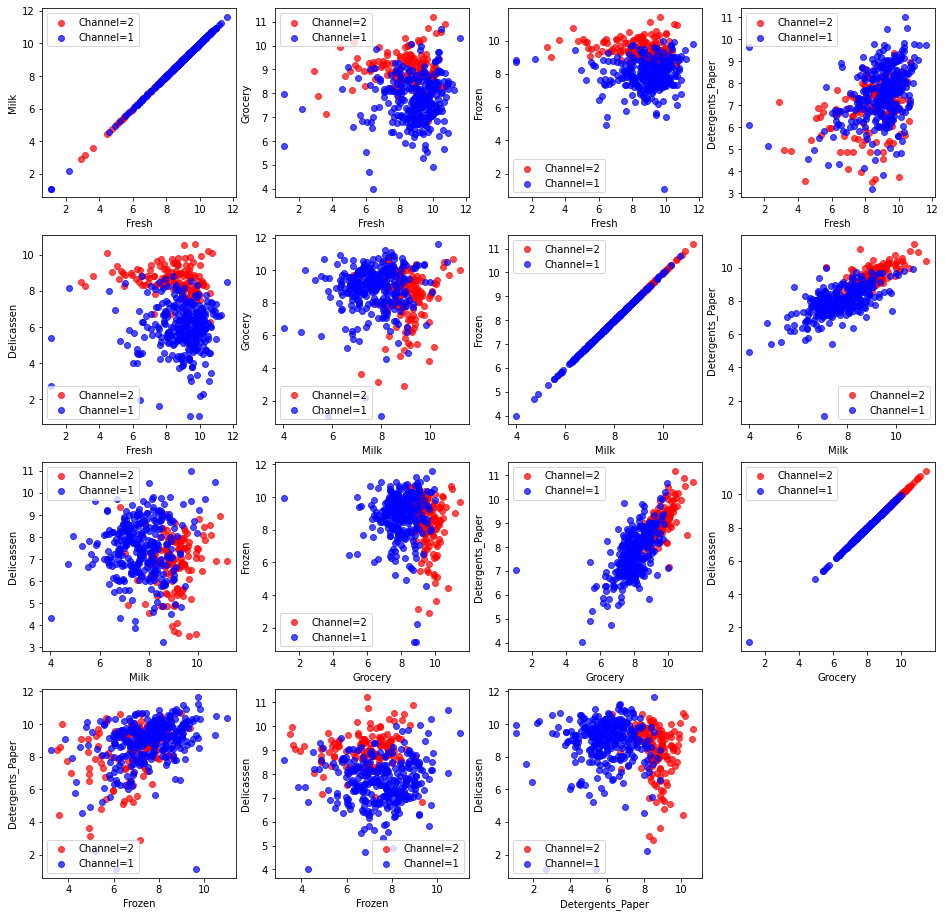

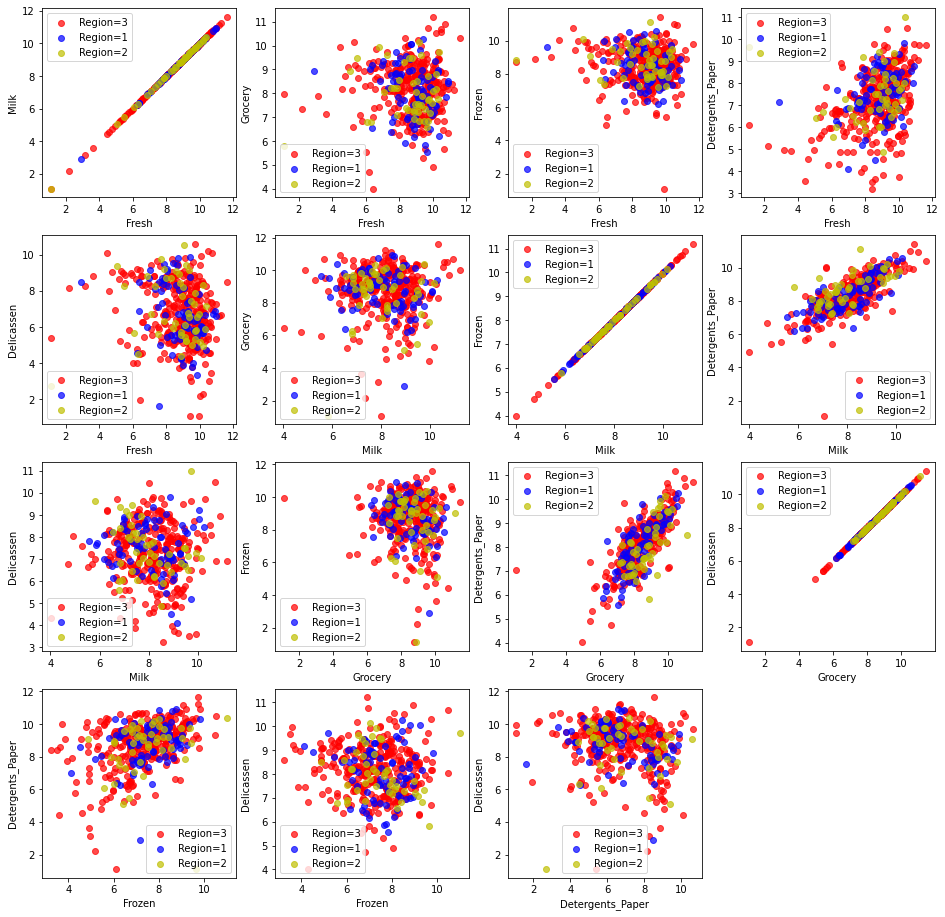

In [47]:
c_map = ['r', 'b', 'y']

columns = df_drop.columns

plt.figure(figsize=(16, 16))
cnt = 0
for i, column1 in enumerate(columns):
    for j, column2 in enumerate(columns[i+1:]):
        plt.subplot(4, 4, cnt+1)
        plt.xlabel(column1)
        plt.ylabel(column2)
        cnt += 1

        for k, data in enumerate(df["Channel"].unique()):
            plt_data = np.log(np.array(df[df["Channel"]==data].drop(columns=["Channel", "Region"])))
            plt.scatter(plt_data[:, i], plt_data[:, j], 
                        marker="o", alpha=0.7, c=c_map[k], label="Channel="+str(data))
        plt.legend()
plt.show

plt.figure(figsize=(16, 16))
cnt = 0
for i, column1 in enumerate(columns):
    for j, column2 in enumerate(columns[i+1:]):
        plt.subplot(4, 4, cnt+1)
        plt.xlabel(column1)
        plt.ylabel(column2)
        cnt += 1

        for k, data in enumerate(df["Region"].unique()):
            plt_data = np.log(np.array(df[df["Region"]==data].drop(columns=["Channel", "Region"])))
            plt.scatter(plt_data[:, i], plt_data[:, j], 
                        marker="o", alpha=0.7, c=c_map[k], label="Region="+str(data))
        plt.legend()
plt.show


- クラスタ数が2の場合とチャネル毎の分類を視覚化したもので比較すると、おおよそクラスタリングはチャネル毎の分類と一致しているように見える。
- クラスタ数が3の場合と地域ごとの分類を視覚化したもので比較しても、関係性はあまり見られなかった。クラスタリングによって分類された領域の意味を読み取ることは出来なかった。

### 【問題12】卸売業者にとって有益な情報
卸売業者にとって有益な情報を探し出し文章にまとめてください。
《ヒント》

前処理を行う前のデータを使い、各クラスタの要約統計量を見るなどしてみましょう。また、PCAで次元削減したデータに対してK-meansを使用しましたが、6個の特徴量をそのまま使ったり、一部の特徴量のみを使ったりということも試してみてください。既知のグループとの比較結果も参考にしてください。

条件ごとにデータを見る際にはPandasのgroupbyが便利です。

- 卸先が小売なのかホレカなのかで、品目それぞれの支出額が大別できると考えられる。

### 【問題13】（アドバンス課題）他の手法の調査
今回扱ったK-means以外に非階層クラスタリングで有名な手法としては DBSCAN 、PCA以外に次元削減手法で有名な手法としては t-SNE や LLE があります。

- DBSCANのメリット・デメリット
- t-SNE、LLEのメリット・デメリット

について記述してください。

#### DBSCANのメリット・デメリット
[参照した記事](https://aizine.ai/dbscan-0712/)
- 概要

データの密度を基準として、クラスタリングをするアルゴリズム。ある半径の内側に存在するデータ数で密度を決め、半径近くにないデータをノイズとして扱う。

##### メリット
- クラスタ数を設定する必要がない
- 外れ値をノイズとして除去できる(外れ値の影響を受けにくい)

##### デメリット
- 計算に時間がかかる
- クラスタ間で密度が異なる場合や、データが密集している場合に不向き

#### t-SNE、LLEのメリット・デメリット
[参照した記事(t-SNE)](https://aizine.ai/glossary-tsne/)  [参照した記事2(t-SNE)](https://qiita.com/wsuzume/items/26a7c08f00f59992561f)

[参照した記事(LLE)](https://helve-python.hatenablog.jp/entry/locally-linear-embedding)
- 概要

どちらも非線形データを対象とする次元削減手法

##### メリット
- t-SNE
  - 線形では表現できない関係も学習して次元削減を行える
- LLE
  - 大域的な位置関係を保存できる

##### デメリット
- t-SNE
  - 計算が遅い
  - 新しい入力に対しては計算し直す必要がある
- LLE
  - 多様体が複数ある場合、互いの位置関係をうまく保存できない
  - 圧縮後のデータ位置を再構成する計算量がデータ数の2乗に比例するため、大規模なデータに適用しづらい
  
 ###### 多様体について
 多様体 (manifold) とは、簡単に表すと、局所的に低次元の超平面と見なせる図形のことである。
例えば、以下に示すSwiss Rollは、3次元空間のデータであるが、局所的には2次元の平面と見なせる。
すなわち、データから2次元平面をうまく見つけることができれば、構造を保ったまま3次元から2次元に圧縮できる。
<img src="https://cdn-ak.f.st-hatena.com/images/fotolife/H/Helve/20190922/20190922134756.png" width="400">

### 【問題14】（アドバンス課題）t-SNEとDBSCANの利用
Wholesale customersのデータに対して、PCAではなく、 t-SNE を用いて次元削減をしてください。さらにK-meansではなく、 DBSCAN を用いてクラスタリングしてください。

そのクラスタリング結果をPCA+kmeansの場合の結果と比較してみましょう。実装にはscikit-learnを用いてください。

- [sklearn.manifold.TSNE — scikit-learn 0.20.2 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html)
- [sklearn.cluster.DBSCAN — scikit-learn 0.20.2 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html)

《パラメーターチューニング》

これらはK-meansやPCAに比べパラメーターチューニングが難しい手法です。scikit-learnのドキュメントと共に論文も参考にしながらパラメータの意味を確認することも大切になります。

- [t-SNEの論文](https://www.jmlr.org/papers/volume9/vandermaaten08a/vandermaaten08a.pdf)
- [DBSCANの論文](https://www.aaai.org/Papers/KDD/1996/KDD96-037.pdf)

In [48]:
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN

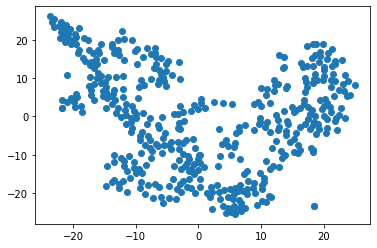

In [49]:
X_TSNE = TSNE(n_components=2, random_state=0).fit_transform(np.array(df_drop))

plt.scatter(X_TSNE[:, 0], X_TSNE[:, 1])

<function matplotlib.pyplot.show(*args, **kw)>

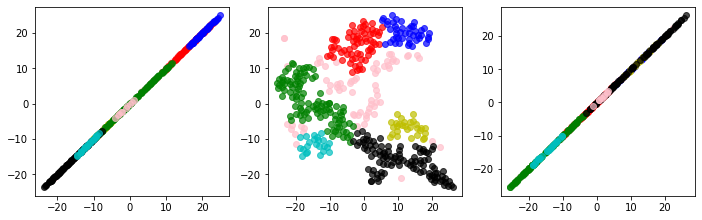

In [167]:
db = DBSCAN(eps=3, min_samples=10)
y_pred = db.fit_predict(X_TSNE)

c_map = ['r', 'b', 'y', 'g', 'k', 'c', 'pink']

plt.figure(figsize=(16, 16))
cnt = 0
for i in range(2):
    for j in range(i+1):
        plt.subplot(4, 4, cnt+1)
        cnt += 1

        for cluster in np.unique(y_pred):
            index = np.where(y_pred == cluster)
            plt.scatter(X_TSNE[index, i], X_TSNE[index, j], 
                        marker="o", alpha=0.7, c=c_map[cluster])
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

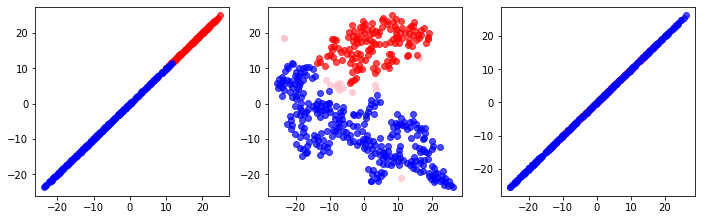

In [172]:
db = DBSCAN(eps=3.6, min_samples=10)
y_pred = db.fit_predict(X_TSNE)

c_map = ['r', 'b', 'y', 'g', 'k', 'c', 'pink']

plt.figure(figsize=(16, 16))
cnt = 0
for i in range(2):
    for j in range(i+1):
        plt.subplot(4, 4, cnt+1)
        cnt += 1

        for cluster in np.unique(y_pred):
            index = np.where(y_pred == cluster)
            plt.scatter(X_TSNE[index, i], X_TSNE[index, j], 
                        marker="o", alpha=0.7, c=c_map[cluster])
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

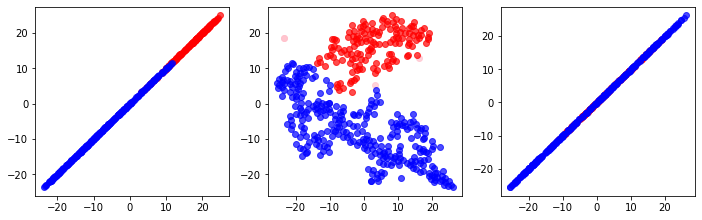

In [168]:
db = DBSCAN(eps=4, min_samples=10)
y_pred = db.fit_predict(X_TSNE)

c_map = ['r', 'b', 'y', 'g', 'k', 'c', 'pink']

plt.figure(figsize=(16, 16))
cnt = 0
for i in range(2):
    for j in range(i+1):
        plt.subplot(4, 4, cnt+1)
        cnt += 1

        for cluster in np.unique(y_pred):
            index = np.where(y_pred == cluster)
            plt.scatter(X_TSNE[index, i], X_TSNE[index, j], 
                        marker="o", alpha=0.7, c=c_map[cluster])
plt.show

非線形なデータに対し次元削減をし、また、大きく外れ値を持たせない形でクラスタリングを行った結果、視覚的には分類が出来ているように見える。
PCA + k_meansでの方法とは見え方が異なる。